# Project 2C Draft 1 of your Jupyter Notebook and Self-Assessment

Scientific Question: Are mice such good animal models for diabetes because the insulin receptor substrate-1 gene (IRS1) is similar between mice and humans?

Scientific Hypothesis: If IRS1 is a probable gene for causing type 2 diabetes and mice and humans have similar endocrine systems, then the IRS1 gene sequence and structure between the two animals will be very similar. 

## Pairwise sequence alignment (PSA)

In [1]:
# Import libraries
from Bio import pairwise2
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment
from Bio import SeqIO

mice = list(SeqIO.parse("rcsb_pdb_1AYB.fasta", "fasta"))
miceA = mice[0].seq
miceB = mice[1].seq

human = list(SeqIO.parse("rcsb_pdb_1IRS.fasta", "fasta"))
humA = human[0].seq
humB = human[1].seq

# Creating sample sequences
seq_miceA = Seq(miceA)
seq_miceB = Seq(miceB)

seq_humA = Seq(humA)
seq_humB = Seq(humB)

# Finding similarities
alignmentA = pairwise2.align.globalxx(seq_miceA, seq_humA)
alignmentB = pairwise2.align.globalxx(seq_miceB, seq_humB)

# # Showing results
for match in alignmentA:
	print(match)

# for alignment in alignmentA:
#     print(format_alignment(*alignment))

for match in alignmentB:
	print(match)

# for alignment in alignmentB:
#     print(format_alignment(*alignment))


Alignment(seqA='MRRWFHPNITGVE-A--ENLL-----LTR---GVD-GSF----LA----RP----SK--SNPGDFT--L-S----V-------RR-----N------G--AVTHIKIQNTGDYYDLYG-GEKFATLAEL---V------QYY-MEHHGQ---LKEKNG------DVIELKY--PLN-', seqB='M---------G--PAFKE---VWQVIL--KPKG--LG--QTKNL-IGIYR-LCLTSKTIS----F-VKLNSEAAAVVLQLMNIRRCGHSENFFFIEVGRSAV-------T-------GPGE-F------WMQVDDSVVAQ--NM--H--ETIL-E---AMRAMSD--E---FRP--R', score=36.0, start=0, end=177)
Alignment(seqA='MRRWFHPNITGVEA--ENLL-----LTR---GVD-GSF----LA----RP----SK--SNPGDFT--L-S----V-------RR-----N------G--AVTHIKIQNTGDYYDLYG-GEKFATLAEL---V------QYY-MEHHGQ---LKEKNG------DVIELKY--PLN-', seqB='M---------G-PAFKE---VWQVIL--KPKG--LG--QTKNL-IGIYR-LCLTSKTIS----F-VKLNSEAAAVVLQLMNIRRCGHSENFFFIEVGRSAV-------T-------GPGE-F------WMQVDDSVVAQ--NM--H--ETIL-E---AMRAMSD--E---FRP--R', score=36.0, start=0, end=176)
Alignment(seqA='MRRWFHPNITGVEA--ENLL-----LTR---GVD-GSF----LA----RP----SK--SNPGDFT--L-S----V-------RR-----N------G--AVTHIKIQNTGDYYDLYG-GEKFATLAEL---V------QYY-MEHHGQ---LKEKNG-----

## Heatmap 

In [3]:
import numpy as np
total_scores_array = np.array([])

for i in range(0, len(mice)):
    scores_array = np.array([])
    for j in range(0, len(human)):
        if mice[i].seq != human[j].seq:
            alignments = pairwise2.align.globalxx(mice[i].seq, human[j].seq)
            scores_array = np.append(scores_array, alignments[0].score)
    total_scores_array = np.append(total_scores_array, scores_array)
    
print(total_scores_array)

[36.  7. 10.  4.]


In [4]:
my_array = np.reshape(total_scores_array, (-1, 2))

In [5]:
import pandas as pd

df = pd.DataFrame(my_array, columns = ['Column_A','Column_B'])
df

,Column_A,Column_B
0,36.0,7.0
1,10.0,4.0


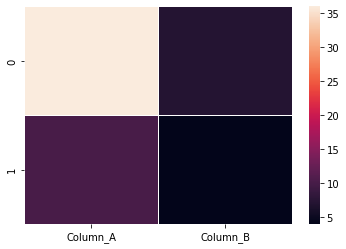

In [6]:
import seaborn as sns
import matplotlib.pylab as plt
uniform_data = df
ax = sns.heatmap(uniform_data, linewidth=0.5)
plt.show()

## Structural Bioinformatics

In [7]:
import nglview as nv
view = nv.show_structure_file('human.pdb')
view.clear_representations()
view.add_cartoon(color='blue')
view

NGLWidget()

In [8]:
view.clear_representations()
view.add_cartoon(color='blue')
view.add_component(nv.PdbIdStructure("1ayb"), color='red')

![Full Image](images/total.png)

Human IRS in green and mice IRS in cyan.

## 3D protein measurements

![Distance Measurement](images/distance1.png)

![Arrow Distance Measurement](images/arrowDistance.png)

![Angle Measurement](images/angle.png)

Images aligned by Chain A. Distance between shared features on both proteins was measured. Human IRS in green, mice IRS in cyan.